In [1]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [2]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("Attention iss all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [4]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [5]:
wiki.invoke("What is machine learning")

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

In [7]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"]="ReAct-agent"

In [8]:
### Custom Functions
def multiply(a: int, b: int) -> int:
    """Multiply a and b.
    Args:
            a: first int
            b: second int
    """
    return a * b
# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.
    Args:
            a: first int
            b: second int
    """
    return a + b
def divide(a: int, b: int) -> float:
    """
    Args:
            a: first int
            b: second int\
    """
    return a / b
    
tools=[arxiv,wiki,add,multiply,divide]

In [9]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()

C:\Users\Win 11\AppData\Local\Temp\ipykernel_6020\637379855.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [10]:
tavily.invoke("Provide me the recent AI news for march 3rd 2025")

[{'title': 'Top 5 AI trends in March 2025: AI agents, smarter supply ... - Neudesic',
  'url': 'https://www.neudesic.com/blog/top-5-ai-trends-march-2025/',
  'content': "1. OpenAI Releases New Tools for Building AI Agents · 2. Microsoft's KBLaM: External Knowledge Integration for LLMs · 3. Neudesic's AI-Powered",
  'score': 0.98292},
 {'title': 'The latest AI news we announced in March - Google Blog',
  'url': 'https://blog.google/technology/ai/google-ai-updates-march-2025/',
  'content': "Here's a recap of some of our biggest AI updates from March, including Gemini 2.5 Pro, expanded access to AI Overviews, the release of AI Mode and more.",
  'score': 0.97993},
 {'title': 'AI INTELLIGENCE | Weekly Top 10 (3/14/25)',
  'url': 'https://dwealth.news/2025/03/ai-intelligence-weekly-top-10-3-14-25/',
  'content': "Mar 13, 2025—Key AI news includesOpenAI's creative writing model, Alibaba's Quark upgrade, China's Manus AI autonomy, and Google's Gemini Robotics.",
  'score': 0.9768},
 {'title'

In [11]:
### Combine all the tools in the list
tools=[arxiv,wiki,tavily,add,divide,multiply]

In [12]:
## Initialize my LLM model
from langchain.chat_models import init_chat_model
llm=init_chat_model(model="openai:gpt-3.5-turbo")
llm_with_tools=llm.bind_tools(tools)

In [13]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_XcUhxRRdqj86c9fD9MiF8tw3', 'function': {'arguments': '{"query":"recent AI news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 324, 'total_tokens': 344, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CMTAmwHl45EBrcm49EMTgqx1WyZfT', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--853a427a-c549-478f-8504-47fe035aed01-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent AI news'}, 'id': 'call_XcUhxRRdqj86c9fD9MiF8tw3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 324, 'output_tokens': 20, 'total_tokens

In [14]:
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")]).tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'recent AI news'},
  'id': 'call_iWB2FrYOVANx9fe93Q6Js1Nn',
  'type': 'tool_call'}]

In [17]:
## State Schema\n",
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

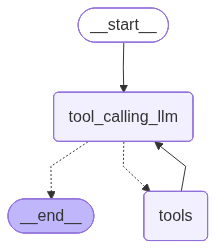

In [20]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}
# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools\n",
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END\n",
    tools_condition,
    )
builder.add_edge("tools","tool_calling_llm")
graph = builder.compile()
# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [22]:
messages=graph.invoke({"messages":HumanMessage(content="Provide me the top 10 recent AI news for MArch 3rd 2025,add 5 plus 5 and then multiply by 10")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Provide me the top 10 recent AI news for MArch 3rd 2025,add 5 plus 5 and then multiply by 10
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_Zfg9SnCEUdOhZ98lPqN61Fsc)
 Call ID: call_Zfg9SnCEUdOhZ98lPqN61Fsc
  Args:
    query: top 10 recent AI news for March 3rd 2025
  multiply (call_aJOlLEOEkOgssSAuZhyTPJCm)
 Call ID: call_aJOlLEOEkOgssSAuZhyTPJCm
  Args:
    a: 10
    b: 10
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "AI INTELLIGENCE | Weekly Top 10 (3/14/25)", "url": "https://dwealth.news/2025/03/ai-intelligence-weekly-top-10-3-14-25/", "content": "TheAI Intelligence Weekly Top 10column presents the most viral topics in artificial intelligence for the week of 3/14/25.", "score": 0.98561}, {"title": "Top 5 AI trends in March 2025: AI agents, sma

In [26]:
### Agent Memory
messages=graph.invoke({"messages":HumanMessage(content="What is 5 plus 8")})
for m in messages['messages']:
     m.pretty_print()

================================ Human Message =================================

What is 5 plus 8
================================== Ai Message ==================================
Tool Calls:
  add (call_D7iMMYYggwm9H2eDrHLYcOal)
 Call ID: call_D7iMMYYggwm9H2eDrHLYcOal
  Args:
    a: 5
    b: 8
================================= Tool Message =================================
Name: add

13
================================== Ai Message ==================================

5 plus 8 is equal to 13.


In [28]:
messages=[HumanMessage(content="Divide that by 5")]
messages=graph.invoke({"messages":messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Divide that by 5
================================== Ai Message ==================================
Tool Calls:
  divide (call_WwIiuqYzbTwnDJArN1k5EQnS)
 Call ID: call_WwIiuqYzbTwnDJArN1k5EQnS
  Args:
    a: 10
    b: 5
================================= Tool Message =================================
Name: divide

2.0
================================== Ai Message ==================================

The result of dividing 10 by 5 is 2.


In [29]:
#### MemorySaver

from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)

In [32]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}
# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools\n",
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END\n",
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")

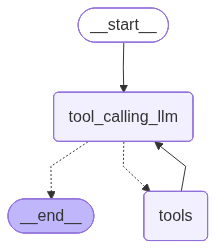

In [33]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
graph_memory = builder.compile(checkpointer=memory)
# View
display(Image(graph_memory.get_graph().draw_mermaid_png()))

In [35]:
# Specify an input
config={"configurable":{"thread_id":"1"}}
messages = [HumanMessage(content="Add 12 and 13")]
messages=graph_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13
================================== Ai Message ==================================
Tool Calls:
  add (call_UdoHI9SnCYJGhLtmcDSxjVlb)
 Call ID: call_UdoHI9SnCYJGhLtmcDSxjVlb
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

12 plus 13 equals 25.


In [36]:
messages = [HumanMessage(content="add that number to 25")]
messages=graph_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13
================================== Ai Message ==================================
Tool Calls:
  add (call_UdoHI9SnCYJGhLtmcDSxjVlb)
 Call ID: call_UdoHI9SnCYJGhLtmcDSxjVlb
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

12 plus 13 equals 25.
================================ Human Message =================================

add that number to 25
================================== Ai Message ==================================
Tool Calls:
  add (call_GsVCtll0wpp2h5OBbf1Sem3t)
 Call ID: call_GsVCtll0wpp2h5OBbf1Sem3t
  Args:
    a: 25
    b: 25
================================= Tool Message =================================
Name: add

50
================================== Ai Message ==================================

25 plus 25 equals 50.


In [37]:
messages = [HumanMessage(content="then multiplty that number by 2")]
messages=graph_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13
================================== Ai Message ==================================
Tool Calls:
  add (call_UdoHI9SnCYJGhLtmcDSxjVlb)
 Call ID: call_UdoHI9SnCYJGhLtmcDSxjVlb
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

12 plus 13 equals 25.
================================ Human Message =================================

add that number to 25
================================== Ai Message ==================================
Tool Calls:
  add (call_GsVCtll0wpp2h5OBbf1Sem3t)
 Call ID: call_GsVCtll0wpp2h5OBbf1Sem3t
  Args:
    a: 25
    b: 25
================================= Tool Message =================================
Name: add

50
================================== Ai Message ==================================

25 plus 25 equals 50.
====